In [3]:
%pylab inline
from sci378 import *
from pyndamics import Simulation
from pyndamics.emcee import *

Populating the interactive namespace from numpy and matplotlib
Version 0.0.5
pyndamics version  0.0.11


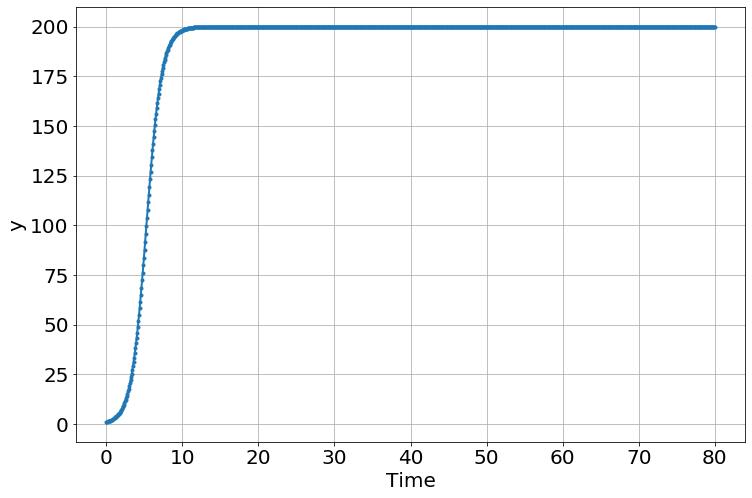

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("y'=r*y*(1-y/K)",1,plot=True)
sim.params(r= 1,K=200)
sim.run(0,80)

## another way to do it, with some more control

In [5]:
sim=Simulation()
sim.add("y'=r*y*(1-y/K)",1)
sim.params(r= 1,K=200)
sim.run(0,80)

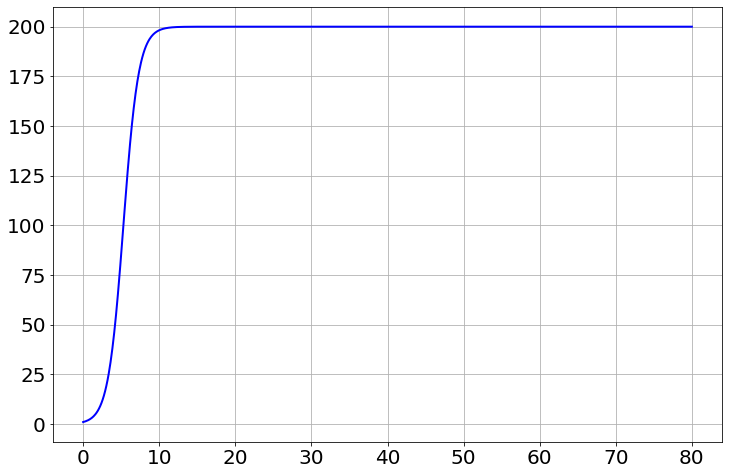

In [6]:
x=sim.t
y=sim.y
plot(x,y,'b-')

## with more than one variable

In [9]:
sim=Simulation()
sim.add("y'=r*y*(1-y/K)",1)
sim.params(r= 1,K=200)
sim.run(0,80)

x1=sim.t
y1=sim.y


sim=Simulation()
sim.add("y'=r*y*(1-y/K)",1)
sim.params(r= 0.2,K=200)  # different r
sim.run(0,80)

x2=sim.t
y2=sim.y


Text(0, 0.5, 'population')

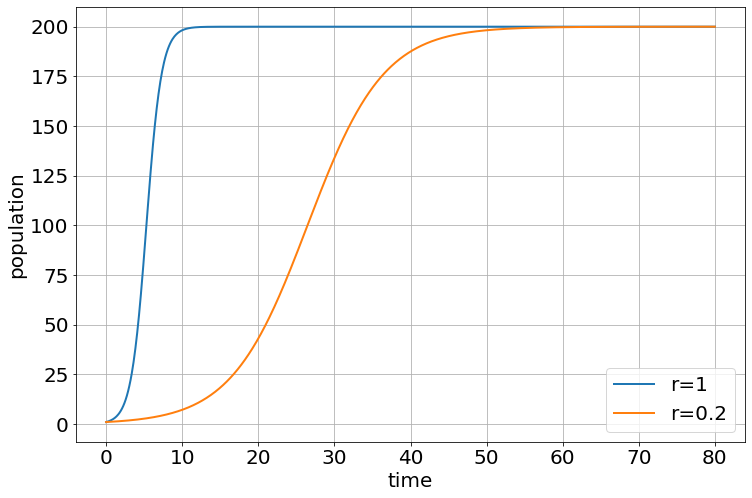

In [10]:
plot(x1,y1,'-',label='r=1')
plot(x2,y2,'-',label='r=0.2')
legend()
xlabel('time')
ylabel('population')

## Now fitting to some data

In [23]:
x_data,y_data=(
    array([ 0.        ,  4.004004  ,  8.00800801, 12.01201201, 16.01601602,
        20.02002002, 24.02402402, 28.02802803, 32.03203203, 36.03603604,
        40.04004004, 44.04404404, 48.04804805, 52.05205205, 56.05605606,
        60.06006006, 64.06406406, 68.06806807, 72.07207207, 76.07607608]),
    array([-16.52420711,   0.83399691,  26.29032381,  92.46966588,
        192.82511069, 360.21219894, 472.59465177, 516.91547329,
        480.05384666, 463.98953003, 501.72818401, 456.0508904 ,
        468.98941972, 512.73730732, 479.49668258, 483.76056329,
        466.88367256, 501.29703993, 501.26889691, 486.47837681]))

In [24]:
sim=Simulation()
sim.add("y'=r*y*(1-y/K)",1)
sim.params(r= 1,K=200)
sim.add_data(t=x_data,y=y_data)
sim.run(0,80)

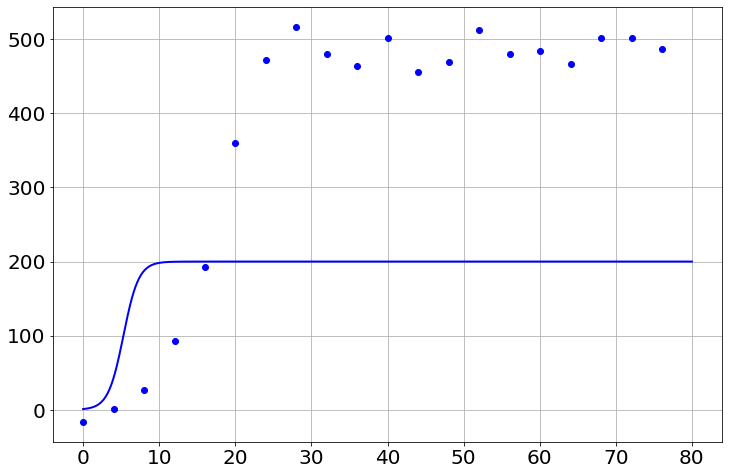

In [25]:
x=sim.t
y=sim.y
plot(x,y,'b-')
plot(x_data,y_data,'bo')

### make a statistical model and fit with MCMC...may take a while (2-5 min) to run when you do the run_mcmc line

In [26]:
model=MCMCModel(sim,
               r=Uniform(0,1),
               K=Uniform(300,700))

Sampling Prior...
Done.
0.38 s
Running MCMC 1/2...
Done.
1 m, 0.84 s
Running MCMC 2/2...
Done.
1 m, 3.01 s


<Figure size 864x576 with 0 Axes>

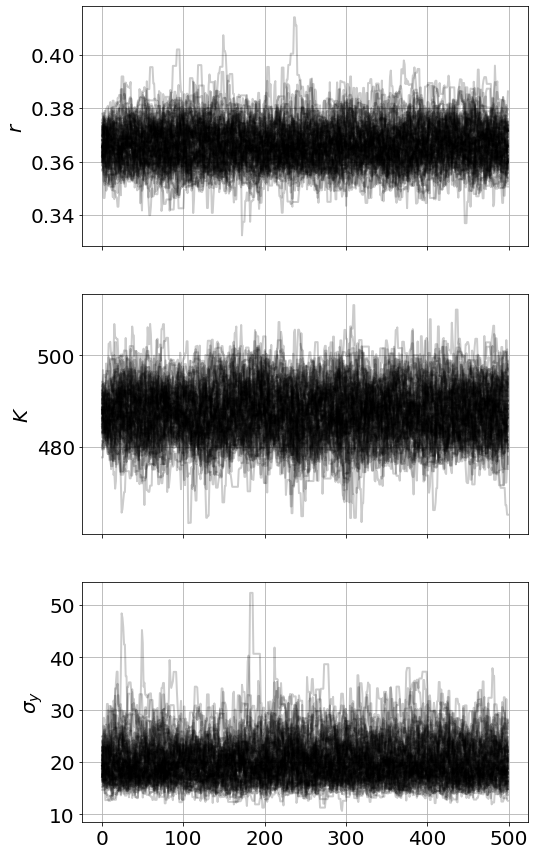

In [27]:
model.run_mcmc(500,repeat=2)
model.plot_chains()

### rerun with the best fit

In [28]:
sim.run(0,80)

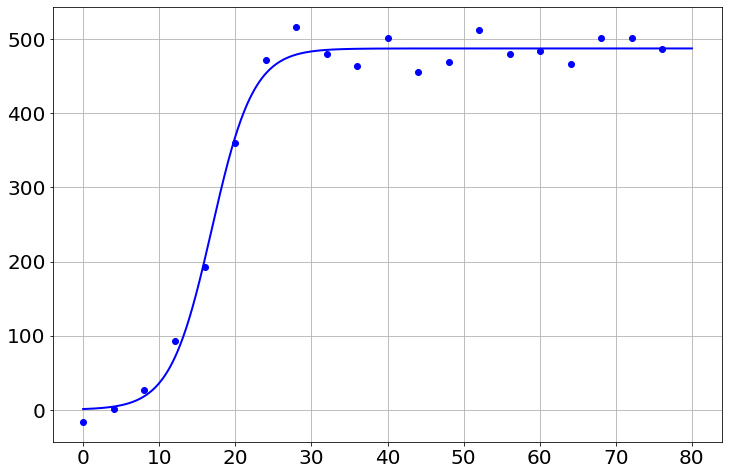

In [29]:
x=sim.t
y=sim.y
plot(x,y,'b-')
plot(x_data,y_data,'bo')

### plot the distributions of the parameters, which gives the best fit values and uncertainties for parameters

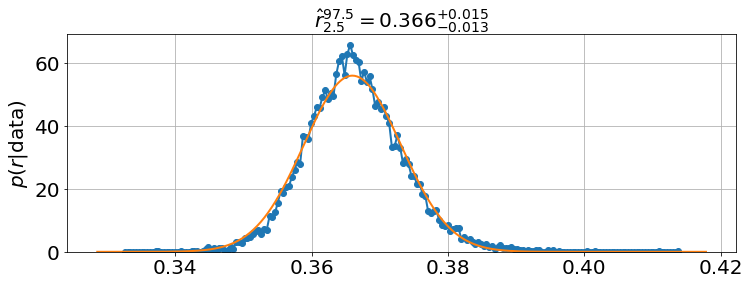

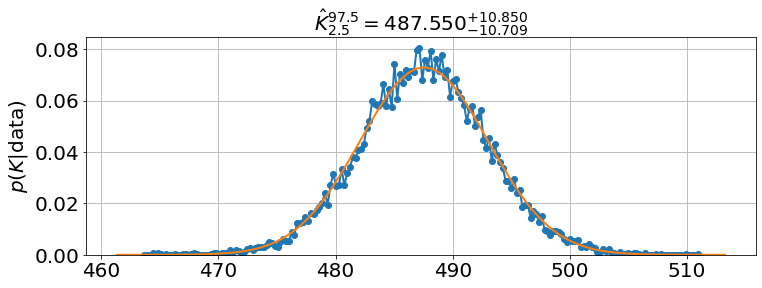

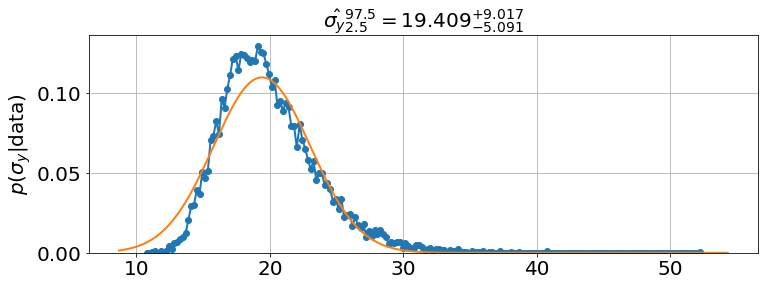

In [30]:
model.plot_distributions()  